## 1. Iris 데이터셋 선형 SVM 분류

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris['data'][:, (2,3)] # 꽃잎 길이, 꽃잎 너비 feature 만 추출
y = (iris['target']==2).astype(np.float64) # Iris virginica

Text(0, 0.5, 'petal width')

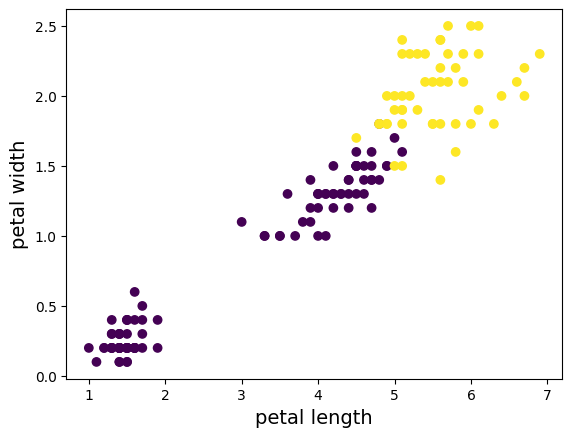

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width' ,fontsize=14)

In [9]:
def plot_svc_decision_boundary(svm_clf):
  w = svm_clf.named_steps['linear_svc'].coef_[0]
  b = svm_clf.named_steps['linear_svc'].intercept_[0]

  w_new = -w[0]/w[1]
  b_new = -b/w[1]

  line = svm_clf.named_steps['scaler'].inverse_transform([[-2, (-2*w_new)+b_new],[2,2*w_new+b_new]])

  plt.plot(line[:,0], line[:,1], "k:", label="LinearSVC")

### 1-1. 하이퍼파리미터 C가 1인 경우

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))
])


svm_clf_1.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [11]:
print(svm_clf_1.named_steps['linear_svc'].coef_)
print(svm_clf_1.named_steps['linear_svc'].intercept_)

[[1.63328027 2.38786154]]
[-2.50520656]


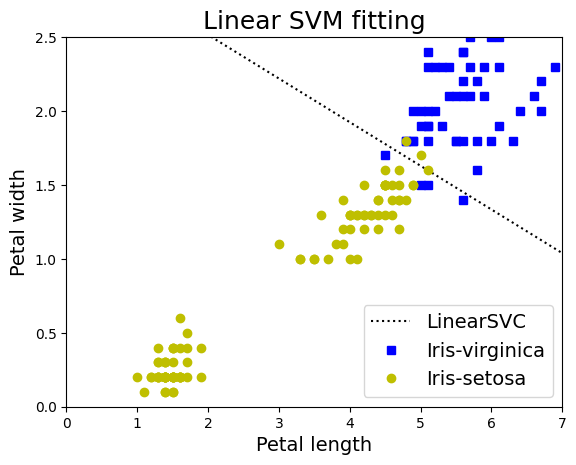

In [12]:
plot_svc_decision_boundary(svm_clf_1)

plt.plot(X[:,0][y==1], X[:, 1][y==1], 'bs', label='Iris-virginica')
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'yo', label='Iris-setosa')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.title("Linear SVM fitting", fontsize=18)
plt.axis([0,7, 0, 2.5])
plt.show()

### 1-2. 하이퍼파리미터 C가 50인 경우

[[4.85336148 3.66735366]]
[-5.04990632]


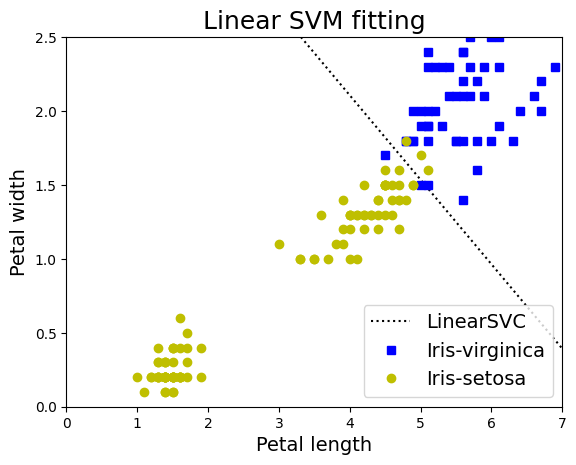

In [13]:
svm_clf_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=50, loss='hinge', random_state=42))
])


svm_clf_2.fit(X, y)

print(svm_clf_2.named_steps['linear_svc'].coef_)
print(svm_clf_2.named_steps['linear_svc'].intercept_)

plot_svc_decision_boundary(svm_clf_2)

plt.plot(X[:,0][y==1], X[:, 1][y==1], 'bs', label='Iris-virginica')
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'yo', label='Iris-setosa')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.title("Linear SVM fitting", fontsize=18)
plt.axis([0,7, 0, 2.5])
plt.show()


### 1-3. 하이퍼파라미터 C가 100인 경우

[[6.39953951 4.83584243]]
[-6.97682194]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


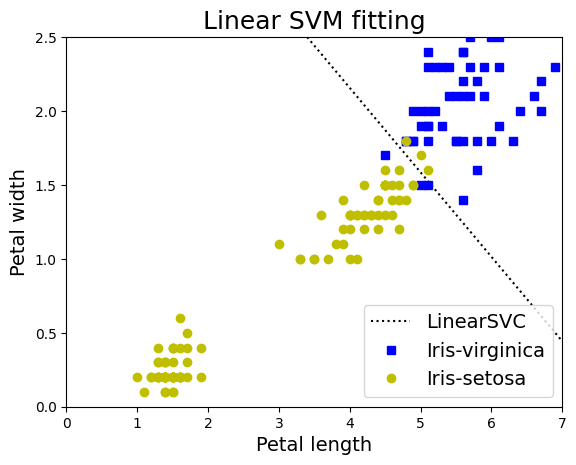

In [14]:
svm_clf_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=100, loss='hinge', random_state=42))
])


svm_clf_3.fit(X, y)

print(svm_clf_3.named_steps['linear_svc'].coef_)
print(svm_clf_3.named_steps['linear_svc'].intercept_)

plot_svc_decision_boundary(svm_clf_3)

plt.plot(X[:,0][y==1], X[:, 1][y==1], 'bs', label='Iris-virginica')
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'yo', label='Iris-setosa')
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.title("Linear SVM fitting", fontsize=18)
plt.axis([0,7, 0, 2.5])
plt.show()

**결과 분석** <br>

소프트마진 분류에서는 하이퍼파라미터 C를 사용해 결정경계 도로의 폭을 조절한다.

1-1. C=1 <br>
위의 경우는 C값이 가장 작은 경우로, 도로의 폭이 가장 넓지만 마진오류의 가능성이 제일 큰 경우이다. C=50, C=100의 시각화 결과와 비교해보았을 때, C=1의 시각화 결과에서 결정경계가 가장 넓은 마진을 가지고 있어 분류 오류가 제일 많았지만, 과적합의 가능성은 가장 낮은 모델임을 알 수 있다.<br>
1-2. C=50 <br>
C=50의 경우, C=1 보다는 결정경게의 마진이 더 좁게 나타났고, 분류오류의 갯수도 적게 나타났다.하지만, 결정경계 부근의 데이터에 대해서는 아직도 정확하게 분류하지 못함을 확인할 수 있었다. <br>
1-3. C=100 <br>
C=100의 경우는 가장 좁은 마진을 가진 경우이고, C=50의 경우보다 결정경계가 Iris-virginica 데이터에 더 가깝게 형성됨을 확인하였고, 과대적합의 가능성이 있다.


## 2. Make_moons 데이터셋 비선형 SVM 분석

In [15]:
def plot_dataset(X,y ,axes):
  plt.plot(X[:,0][y==0], X[:,1][y==0], 'bs')
  plt.plot(X[:, 0][y==1], X[:,1][y==1], 'g^')
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r'$x_1$', fontsize=20)
  plt.ylabel(r'$x_2$', fontsize=20)

def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  #y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
  #plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

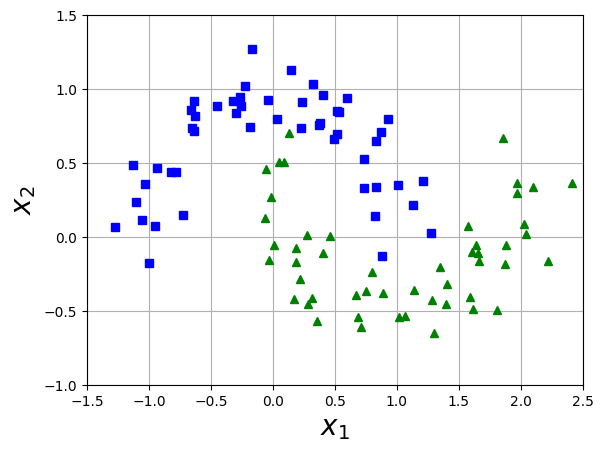

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plot_dataset(X,y, [-1.5, 2.5, -1, 1.5])
plt.show()

### 2-1. 하이퍼파라미터 gamma가 0.1인 경우

**2.1.1 gamma=0.1, C=0.001**

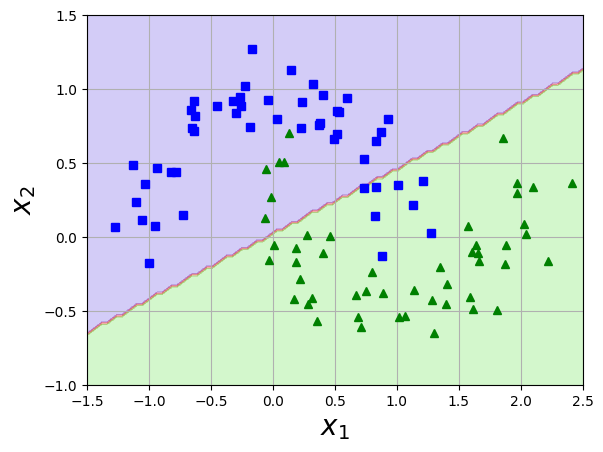

In [17]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=0.001, gamma=0.1))
])

poly_kernel_svm_clf.fit(X,y)


plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

**2.1.2 gamma=0.1, C=1000**

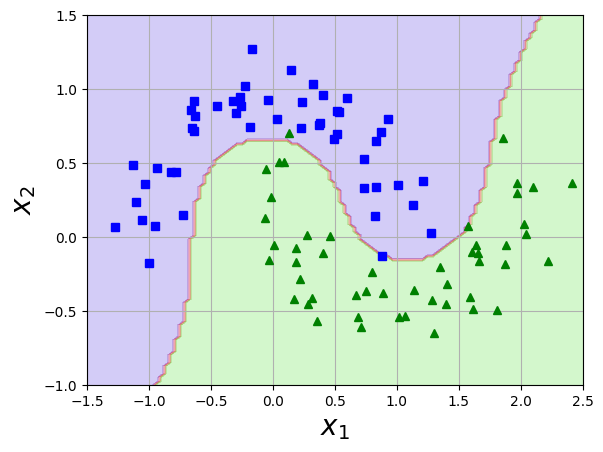

In [18]:
poly_kernel_svm_clf_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=1000, gamma=0.1))
])

poly_kernel_svm_clf_1.fit(X,y)

plot_predictions(poly_kernel_svm_clf_1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### 2-2. 하이퍼파라미터 gamma가 0.5인 경우

**2.2.1 gamma=0.5, C=0.001**

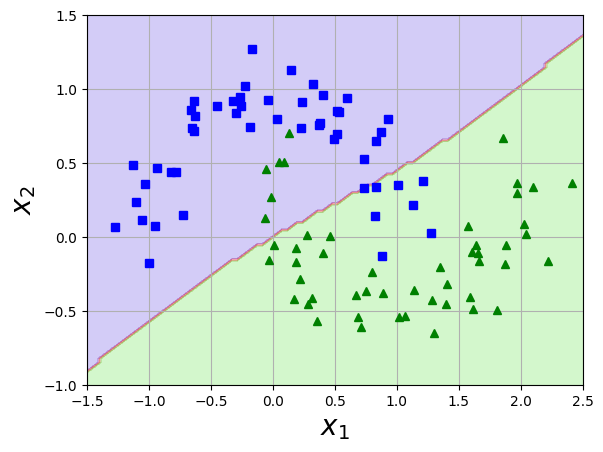

In [19]:
poly_kernel_svm_clf_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=0.001, gamma=0.5))
])

poly_kernel_svm_clf_2.fit(X,y)

plot_predictions(poly_kernel_svm_clf_2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

**2.2.2 gamma=0.5, C=1000**

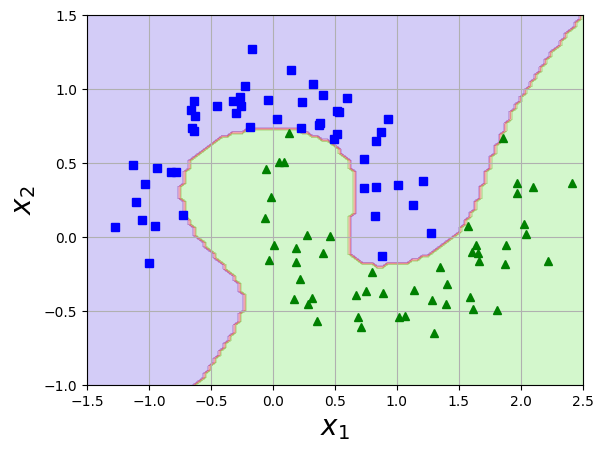

In [20]:
poly_kernel_svm_clf_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=1000, gamma=0.5))
])

poly_kernel_svm_clf_3.fit(X,y)

plot_predictions(poly_kernel_svm_clf_3, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### 2-3. 하이퍼파라미터 gamma가 5인 경우

**2.3.1 gamma=5, C=0.001**

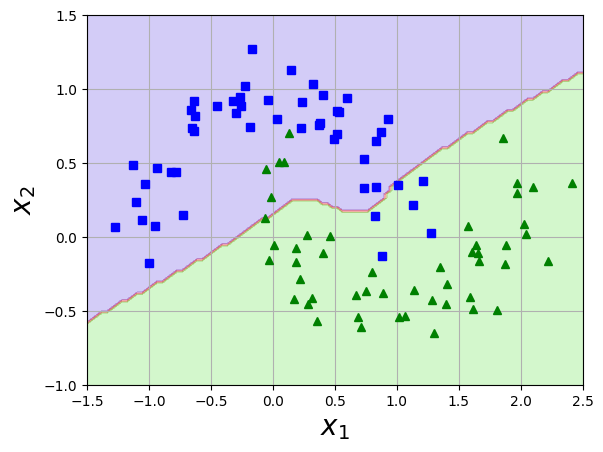

In [21]:
poly_kernel_svm_clf_4 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=0.001, gamma=5))
])

poly_kernel_svm_clf_4.fit(X,y)

plot_predictions(poly_kernel_svm_clf_4, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

**2.3.2 gamma=5, C=1000**

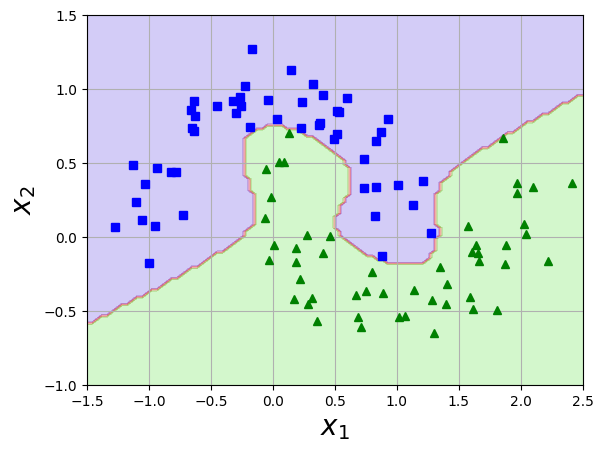

In [22]:
poly_kernel_svm_clf_5 = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=1000, gamma=5))
])

poly_kernel_svm_clf_5.fit(X,y)

plot_predictions(poly_kernel_svm_clf_5, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

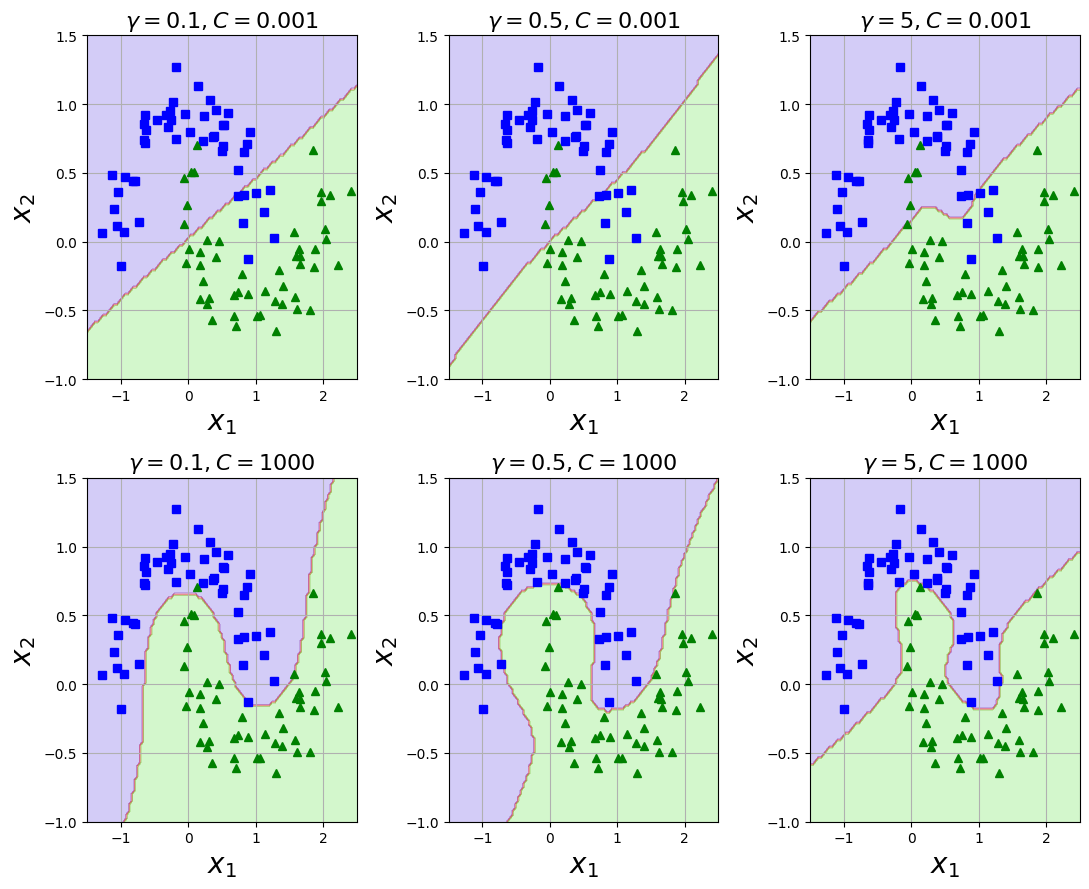

In [23]:
# 하이퍼파라미터 gamma, C 설정
gamma1, gamma2, gamma3 = 0.1, 0.5, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma2, C1), (gamma3, C1), (gamma1, C2), (gamma2, C2), (gamma3, C2)

# 서브플롯 그리기
plt.figure(figsize=(11, 9))

for i, (gamma, C) in enumerate(hyperparams, 1):
    plt.subplot(2, 3, i)
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=C, gamma=gamma))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    plt.title(r"$\gamma={}, C={}$".format(gamma, C), fontsize=16)

plt.tight_layout()
plt.show()

**결과 분석** <br>

비선형 SVM 분류에서는 하이퍼파라미터 C와 gamma값을 사용해 결정경계를 형성하였다. <br>gamma값은 0.1, 0.5, 5로 설정하고, 그에 따라 C값 또한 0.001 과 1000으로 구분하여 실험을 진행하였다. <br>

1. gamma : 커널 반경의 민감도를 결정하는 하이퍼파라미터이다. C=0.001, C=1000 인 경우 모두 gamma값이 커질 수록 결정 경계가 복잡해짐을 확인할 수 있었다. 따라서, gamma값이 클수록 결정경계가 민감해지므로 과대적합이 발생할 가능성이 높다. gamma값이 작으면, 결정경계가 부드러워지고, 과소적합의 가능성이 높다.


2. C: 하이퍼파라미터 C는 오류를 얼마나 허용할 지에 대한 파라미터이다. 실험 결과, gamma값이 같은 경우, C값이 1000이었을 때의 결정경계의 마진값이 훨씬 작게 형성되어 결정경계가 훈련데이터에 더 밀접하게 맞춰 그려진것을 확인할 수 있었다. 따라서, C값이 클수록, 마진이 좁아지고 오분류가 적지만, 과대적합의 가능성이 높다. 반대로, C값이 작을 수록, 마진이 넓어지고 그에 따라 오분류가 많아지지만, 과대적합의 가능성은 적다 (과소적합이 발생할 수 있다).

gamma와 C를 같이 고려한다면, gamma와 C값이 모두 커질 수록, 모델의 복잡도가 증가하고, gamma와 C값이 모두 작아질 수록 모형의 복잡도가 감소함을 확인할 수 있었다.
